In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!wget -O house_price.csv https://github.com/Nima-Tavana/Test/raw/main/file.csv

--2024-07-20 18:44:18--  https://github.com/Nima-Tavana/Test/raw/main/file.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nima-Tavana/Test/main/file.csv [following]
--2024-07-20 18:44:19--  https://raw.githubusercontent.com/Nima-Tavana/Test/main/file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190184 (186K) [text/plain]
Saving to: ‘house_price.csv’

house_price.csv     100%[===================>] 185.73K  --.-KB/s    in 0.03s   

2024-07-20 18:44:19 (5.46 MB/s) - ‘house_price.csv’ saved [190184/190184]



In [ ]:
df = pd.read_csv("house_price.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# **Visualization and Correlation matrix**

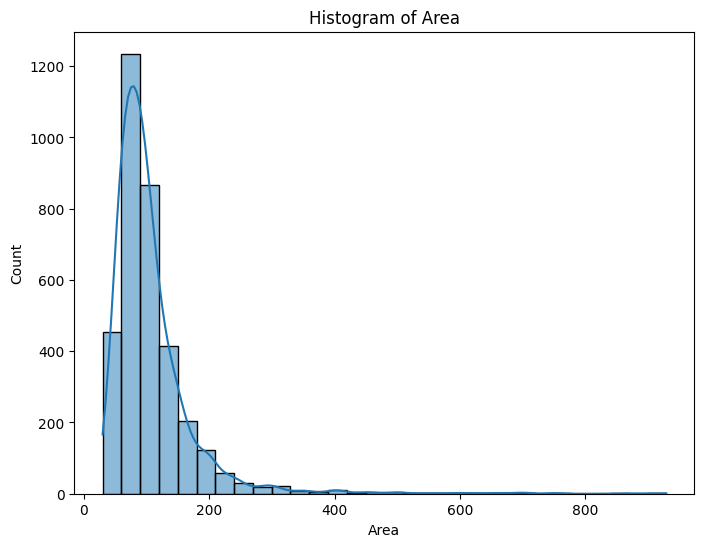

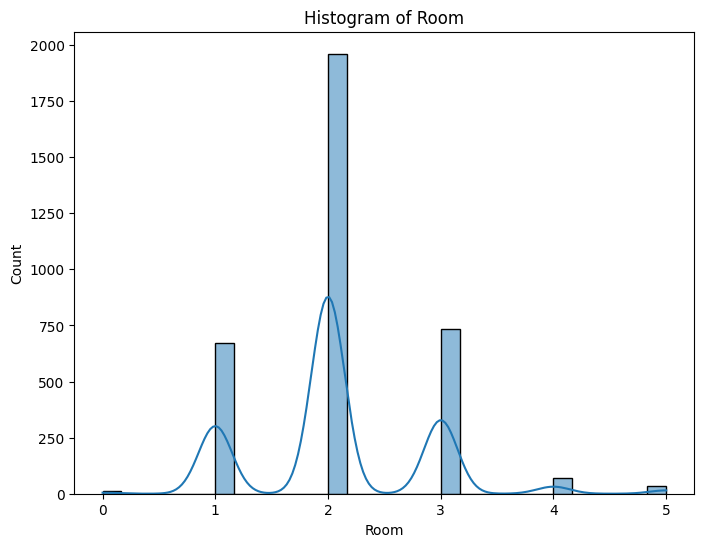

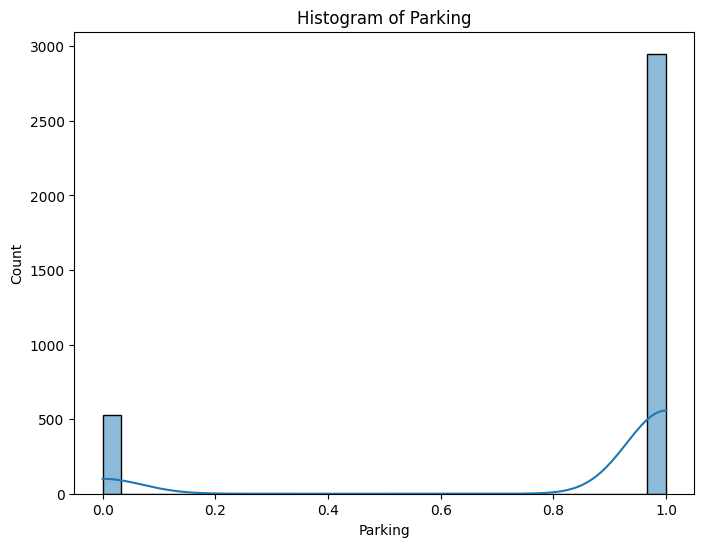

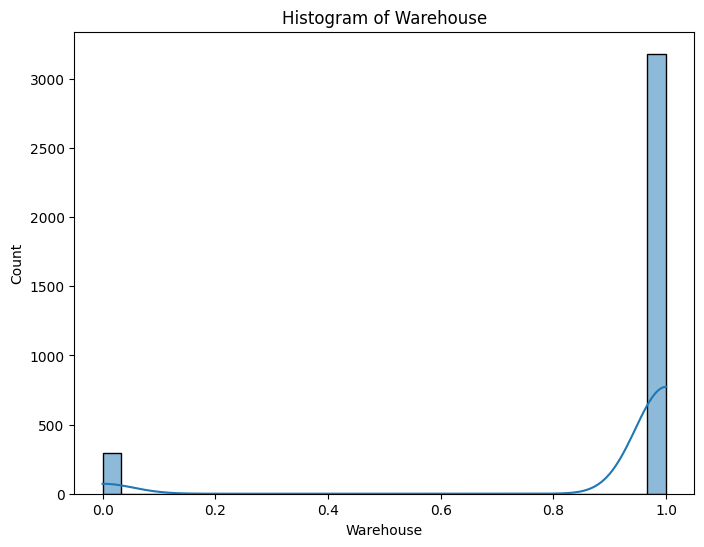

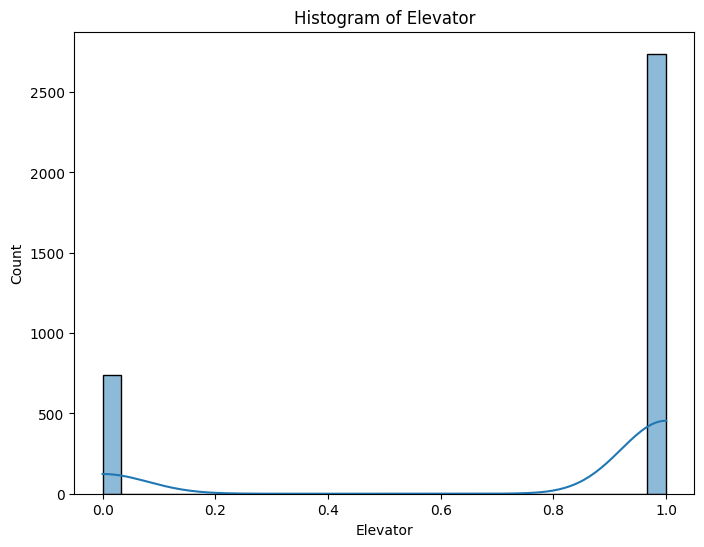

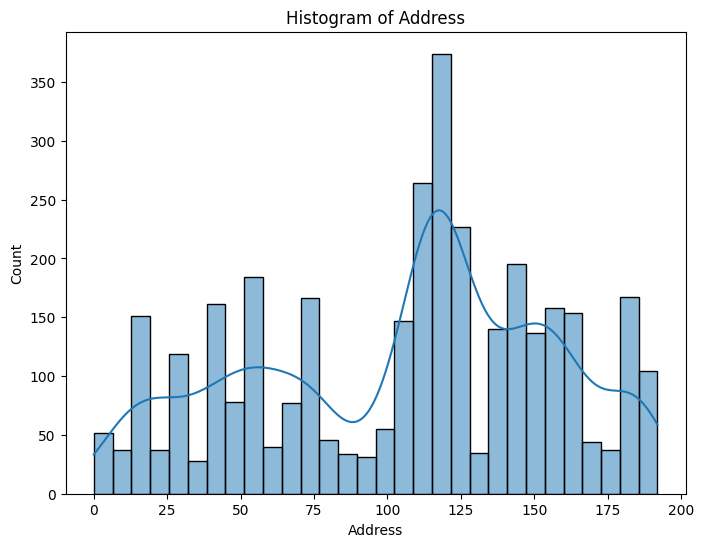

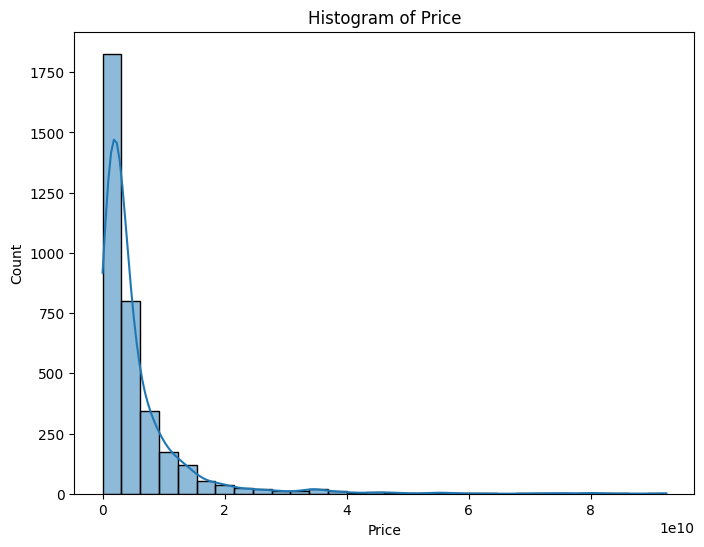

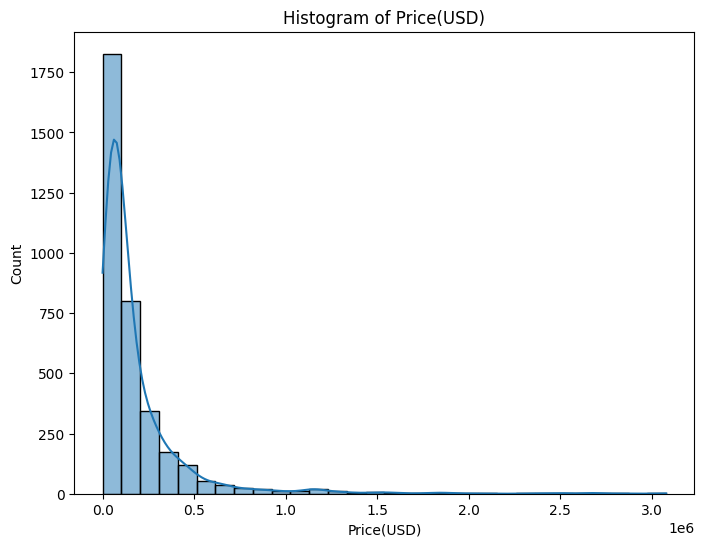

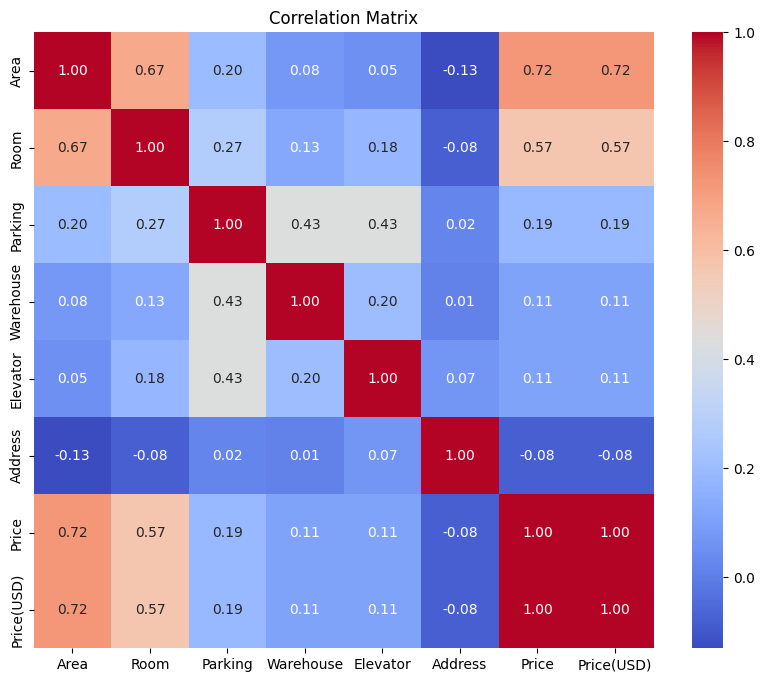

In [ ]:
import seaborn as sns

# Loading data
df = pd.read_csv("house_price.csv")

# Convert text data to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])
df['Address'] = label_encoder.fit_transform(df['Address'])
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

# Draw a histogram of each feature
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Calculation of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Data Cleaning**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

In [ ]:
df['ppm'] = df['Price(USD)'] / df['Area']

In [ ]:
# remove any nan values of each column
df.dropna(subset=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)', 'ppm'], inplace=True)
# some unused feature can be deleted (Based on Correlation matrix)
# can be uncommented
# df.drop('Warehouse', axis=1, inplace=True)
# df.drop('Elevator', axis=1, inplace=True)

In [ ]:
# flitering the area between (30-400)
df = df[(df['Area'] > 30) & (df['Area'] < 600)]
# (important) --> this filtering it interchangable
# (important) --> can be filtered between 30 and 700 or more too (R2 Score would be between 83 to 89)
# df = df[(df['Area'] > 30) & (df['Area'] < 700)]

# **Feature Extraction**

In [ ]:
X = df[['Area','Parking', 'Room', 'ppm']]
y = df['Price(USD)']

# **Nomalizing Features**

In [ ]:
# prompt: normalize X

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

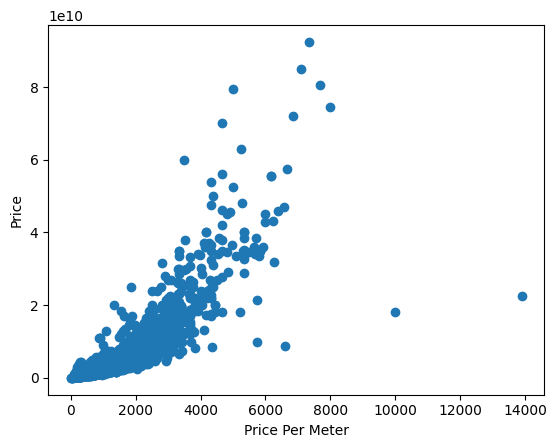

In [ ]:
plt.scatter(df.ppm, df.Price)
plt.xlabel('Price Per Meter')
plt.ylabel('Price')
plt.show

# **Training And Testing With Multiple Linear Regr**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [1187790.34437745  -55755.96030873  -67380.02209215 2097978.73736446]


In [ ]:
test_y_ = regr.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((test_y_ - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 5775551427.35
Variance score: 0.89


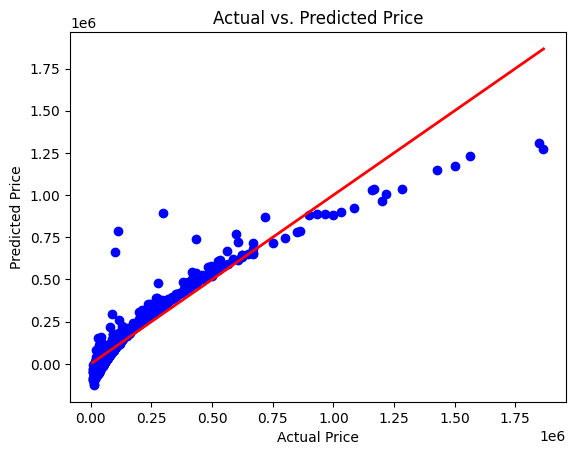

In [ ]:
plt.scatter(y_test, test_y_, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

# **Checking if Overfitting is ocuured or not**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Teaching the Linear Regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Prediction on test data
y_pred = regr.predict(X_test)

# Calculation of evaluation criteria
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Prediction on training data
y_pred_train = regr.predict(X_train)

# Calculation of evaluation criteria on training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the results
print('MSE on Train:', mse_train)
print('R^2 on Train:', r2_train)
print('MSE on Test:', mse_test)
print('R^2 on Test:', r2_test)

# Comparison of model performance on training and test data to detect overfitting
if r2_train > r2_test:
    print('The model is overfitting.')
else:
    print('The model is not overfitting.')

MSE on Train: 9242451062.587055
R^2 on Train: 0.8601681906548893
MSE on Test: 5775551427.348566
R^2 on Test: 0.888957166654195
The model is not overfitting.
